<a href="https://colab.research.google.com/github/M75lix/Machine-learning-project/blob/main/Iranian_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data set:

UCI Machine Learning Repository [https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset], this dataset is randomly collected from an Iranian telecom company

# Import data

In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
Customer_Chrun = pd.read_csv('Customer_Churn.csv')

In [3]:
df = Customer_Chrun.copy()

In [4]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

Missing vules:

In [38]:
df.isnull().sum()

,0
Call Failure,0
Complains,0
Subscription Length,0
Charge Amount,0
Seconds of Use,0
Frequency of use,0
Frequency of SMS,0
Distinct Called Numbers,0
Age Group,0
Tariff Plan,0


Visual persenting of the relation between our lable and the features:

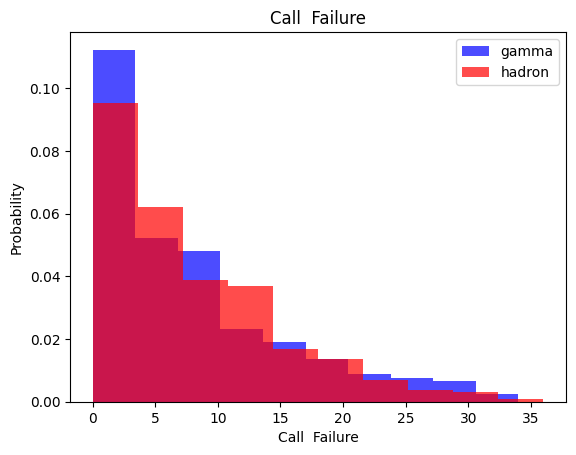

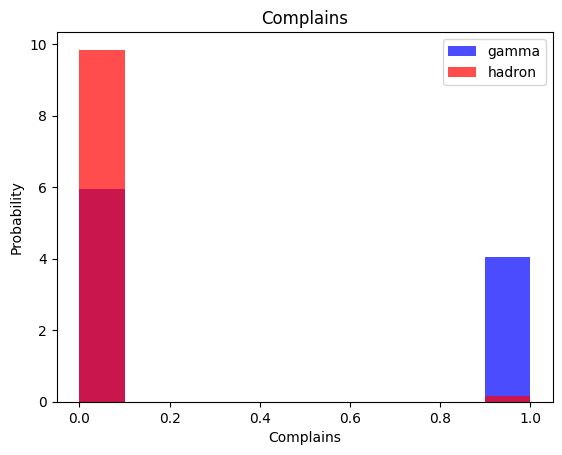

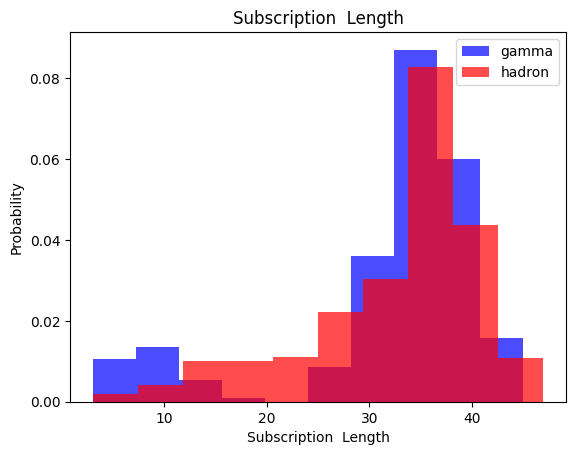

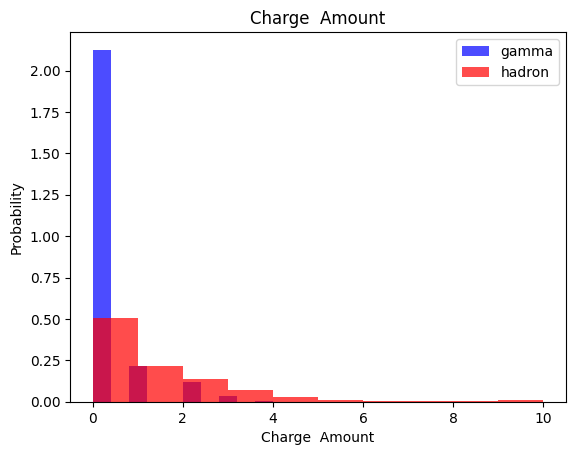

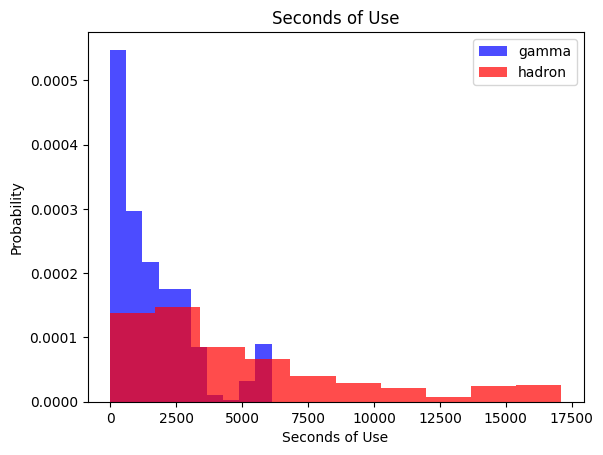

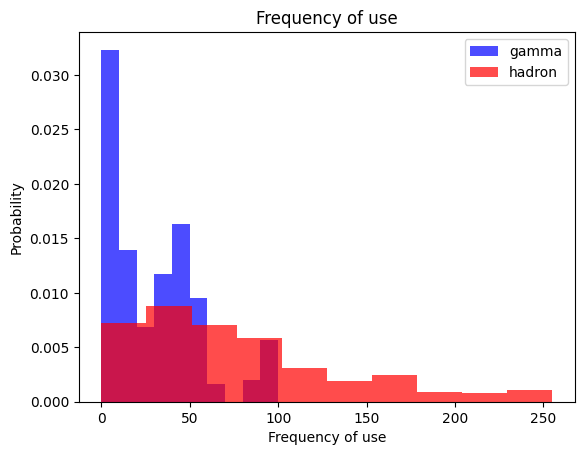

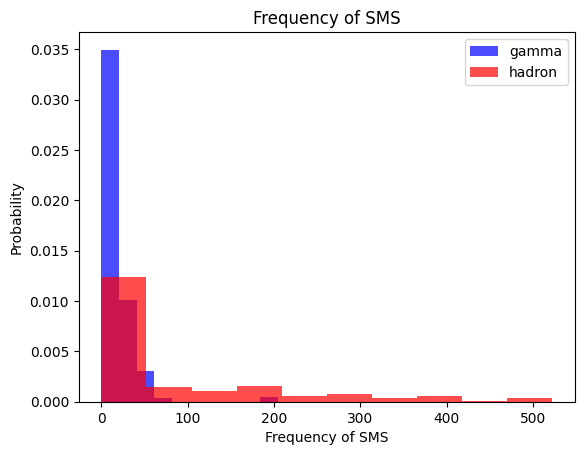

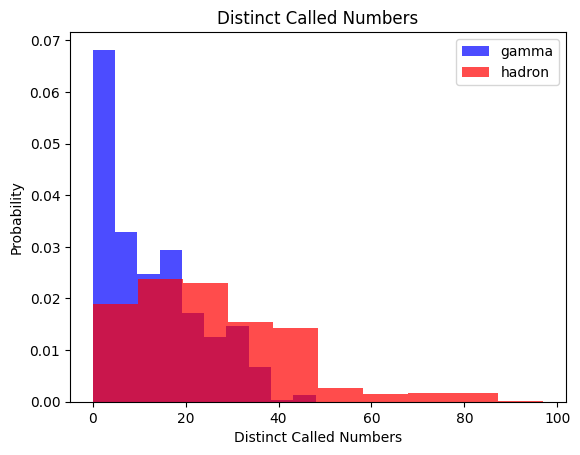

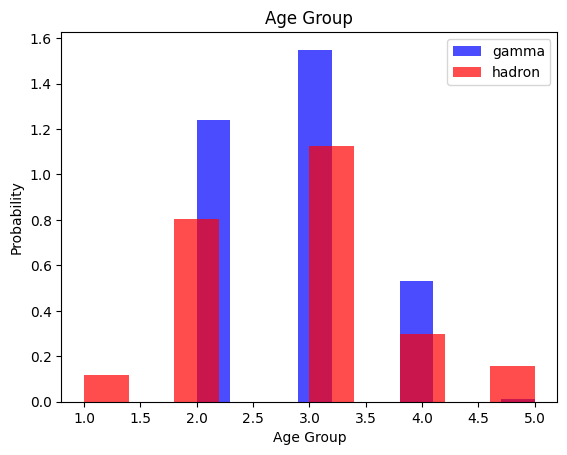

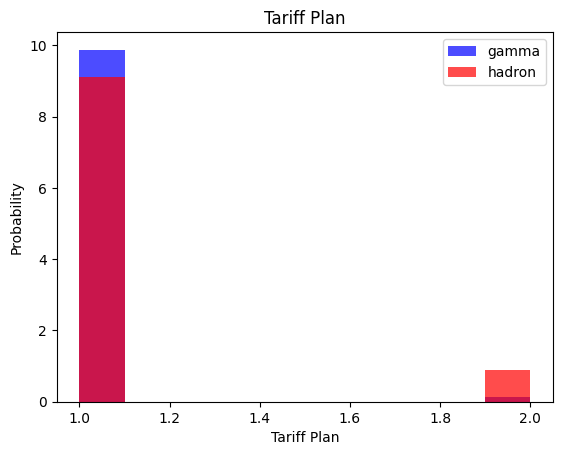

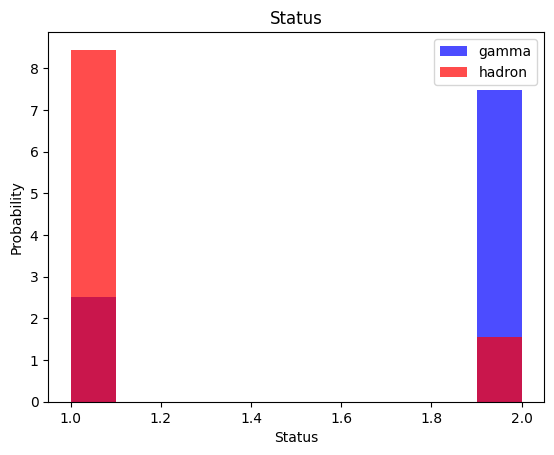

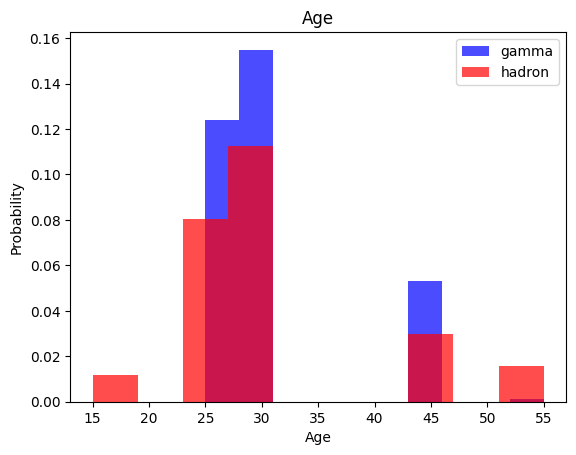

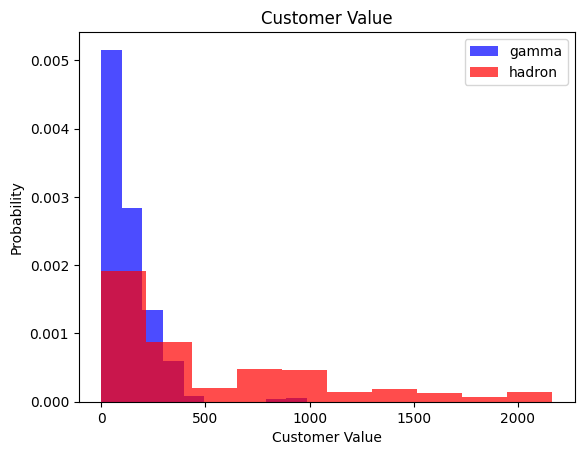

In [6]:
for label in df.columns[:-1]:
  plt.hist(df[df["Churn"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["Churn"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [7]:
df.shape

(3150, 14)

# Split Data, train - valid - test

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


## Scale and OverSample

In [9]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [11]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [12]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))

1600
1600


# Classification

## kNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [15]:
y_pred = knn_model.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       539
           1       0.76      0.88      0.82        91

    accuracy                           0.94       630
   macro avg       0.87      0.92      0.89       630
weighted avg       0.95      0.94      0.94       630



## Log Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
LG_model = LogisticRegression()
LG_model = LG_model.fit(X_train, y_train)

In [18]:
y_pred = LG_model.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       539
           1       0.50      0.88      0.64        91

    accuracy                           0.86       630
   macro avg       0.74      0.87      0.77       630
weighted avg       0.91      0.86      0.87       630



## Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [21]:
y_pred = nb_model.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77       539
           1       0.30      0.95      0.46        91

    accuracy                           0.68       630
   macro avg       0.64      0.79      0.62       630
weighted avg       0.89      0.68      0.73       630



## SVM

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [24]:
y_pred = svm_model.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       539
           1       0.56      0.93      0.70        91

    accuracy                           0.88       630
   macro avg       0.77      0.90      0.81       630
weighted avg       0.93      0.88      0.89       630



## Ranndom Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = rf_model.predict(y_valid)

print(classification_report(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       539
           1       0.87      0.82      0.85        91

    accuracy                           0.96       630
   macro avg       0.92      0.90      0.91       630
weighted avg       0.96      0.96      0.96       630

[[528  11]
 [ 16  75]]


### Random Forest Hyperparameter

In [30]:
from sklearn.model_selection import GridSearchCV

parem_grid = {
    'n_estimators': [10, 100, 200, 300],
    'max_depth': [None, 3, 5, 8, 10, 20],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, parem_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

print("Best paraneters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Best paraneters:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 10}
Best score:  0.9878124999999999


In [32]:
y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       516
           1       0.90      0.81      0.85       114

    accuracy                           0.95       630
   macro avg       0.93      0.89      0.91       630
weighted avg       0.95      0.95      0.95       630

[[506  10]
 [ 22  92]]


feature importance

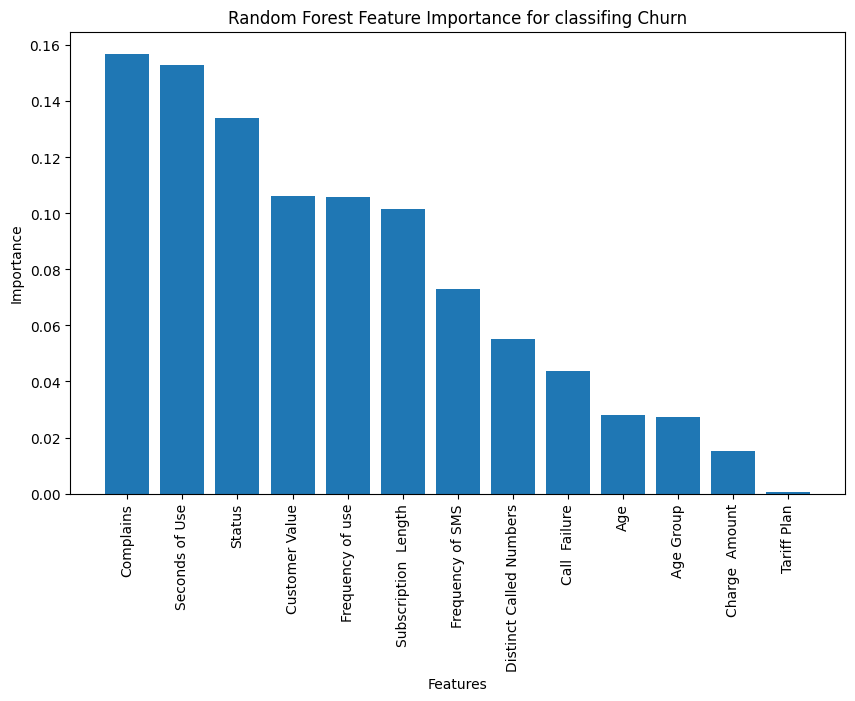

In [37]:
feature_importance = best_rf.feature_importances_
feature_names = df.columns[:-1]

sorted_indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance for classifing Churn')
plt.show()